In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [306]:
data = pd.read_csv('./data/musk_csv.csv')
data.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [307]:
data.describe()

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.00000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,3299.50000,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,...,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,1904.82287,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,...,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,1.00000,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,...,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,1650.25000,37.000000,-193.000000,-137.000000,-70.000000,-117.000000,-28.000000,-159.000000,-85.000000,-217.000000,...,-272.000000,-205.000000,-70.000000,-18.000000,71.000000,166.000000,-68.000000,-179.000000,-9.000000,0.000000
50%,3299.50000,44.000000,-149.000000,-99.000000,-25.000000,-117.000000,33.000000,27.000000,19.000000,-40.000000,...,-234.000000,-131.000000,-21.000000,61.500000,107.000000,191.000000,-60.000000,-150.000000,27.000000,0.000000
75%,4948.75000,53.000000,-95.000000,-19.000000,42.000000,-116.000000,74.000000,57.000000,61.000000,-21.000000,...,-80.000000,52.000000,9.000000,149.000000,129.000000,215.000000,-45.000000,-120.000000,119.000000,0.000000
max,6598.00000,292.000000,95.000000,81.000000,161.000000,325.000000,200.000000,220.000000,320.000000,147.000000,...,94.000000,179.000000,192.000000,411.000000,355.000000,625.000000,295.000000,168.000000,367.000000,1.000000


In [308]:
cleanData =data.copy()
cleanData.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [309]:
cleanData.drop(['molecule_name','ID','conformation_name'],axis=1,inplace=True)

In [310]:
cleanData.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,46,-108,-60,-69,-117,49,38,-161,-8,5,...,-308,52,-7,39,126,156,-50,-112,96,1
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,...,-59,-2,52,103,136,169,-61,-136,79,1
2,46,-194,-145,28,-117,73,57,-168,-39,-22,...,-134,-154,57,143,142,165,-67,-145,39,1
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-60,-4,52,104,136,168,-60,-135,80,1
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-60,-4,52,104,137,168,-60,-135,80,1


In [311]:
cleanData.isnull().values.any()

False

In [312]:
X_train,X_test,Y_train,Y_test=train_test_split(new_data, new_data['class'], test_size = 0.20,random_state=120)

In [313]:
print(X_train.shape)
print(X_test.shape)

(5278, 167)
(1320, 167)


In [314]:
model = Sequential([Flatten(input_shape=(167,)),
                Dense(500,activation='sigmoid'),                          
                Dense(300,activation='relu'),
                Dense(155,activation='sigmoid'),
               
                Dense(1,activation='sigmoid')                          
                         ])


In [315]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 167)               0         
_________________________________________________________________
dense_89 (Dense)             (None, 500)               84000     
_________________________________________________________________
dense_90 (Dense)             (None, 300)               150300    
_________________________________________________________________
dense_91 (Dense)             (None, 155)               46655     
_________________________________________________________________
dense_92 (Dense)             (None, 1)                 156       
Total params: 281,111
Trainable params: 281,111
Non-trainable params: 0
_________________________________________________________________


In [316]:
l_rate=0.0001
training_epoch= 60
batch_size=700
adma= Adam(lr=l_rate)

In [317]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [318]:

op=model.fit(X_train,Y_train,batch_size=batch_size,epochs=training_epoch,verbose=2,validation_data=(X_test,Y_test))

Train on 5278 samples, validate on 1320 samples
Epoch 1/60
 - 1s - loss: 0.5163 - acc: 0.7512 - val_loss: 0.3984 - val_acc: 0.8485
Epoch 2/60
 - 0s - loss: 0.3824 - acc: 0.8452 - val_loss: 0.3635 - val_acc: 0.8485
Epoch 3/60
 - 0s - loss: 0.3409 - acc: 0.8452 - val_loss: 0.3123 - val_acc: 0.8485
Epoch 4/60
 - 0s - loss: 0.2787 - acc: 0.8890 - val_loss: 0.2470 - val_acc: 0.8992
Epoch 5/60
 - 0s - loss: 0.2098 - acc: 0.9257 - val_loss: 0.1867 - val_acc: 0.9326
Epoch 6/60
 - 0s - loss: 0.1520 - acc: 0.9502 - val_loss: 0.1437 - val_acc: 0.9432
Epoch 7/60
 - 0s - loss: 0.1187 - acc: 0.9587 - val_loss: 0.1261 - val_acc: 0.9561
Epoch 8/60
 - 0s - loss: 0.0997 - acc: 0.9659 - val_loss: 0.0988 - val_acc: 0.9636
Epoch 9/60
 - 0s - loss: 0.0875 - acc: 0.9723 - val_loss: 0.1070 - val_acc: 0.9606
Epoch 10/60
 - 0s - loss: 0.0835 - acc: 0.9695 - val_loss: 0.1055 - val_acc: 0.9561
Epoch 11/60
 - 0s - loss: 0.0740 - acc: 0.9750 - val_loss: 0.0854 - val_acc: 0.9689
Epoch 12/60
 - 0s - loss: 0.0660 - ac

In [319]:
print(op.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


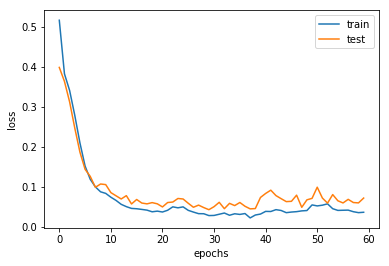

In [320]:
plt.plot(op.history['loss'],label='train')
plt.xlabel('epochs')
plt.plot(op.history['val_loss'],label='test')
plt.ylabel('loss')
plt.legend()
plt.show()

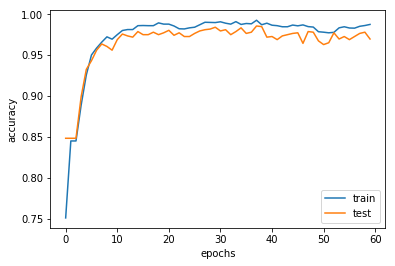

In [321]:
plt.plot(op.history['acc'],label='train')
plt.xlabel('epochs')
plt.plot(op.history['val_acc'],label='test')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [322]:
Y_pred=model.predict(X_test).astype('int').flatten()
print(Y_pred)

[0 0 0 ... 0 0 0]


In [323]:
from sklearn.metrics import classification_report
cls = classification_report(Y_test,Y_pred)
print(cls)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1120
           1       0.00      0.00      0.00       200

   micro avg       0.85      0.85      0.85      1320
   macro avg       0.42      0.50      0.46      1320
weighted avg       0.72      0.85      0.78      1320

